In [14]:
#torchvision: 有良好的電腦視覺模型 EX: AlexNet    也有很多資料集 EX: ImageNet
from torchvision import models
dir(models)
#大寫: Python 類別 (電腦視覺模型)
#小寫: 函式 (用預設的層數和單元數)

['AlexNet',
 'ConvNeXt',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 'VisionTransformer',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'convnext',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 '

In [15]:
import torch
print(torch.__version__)

1.11.0


In [16]:
alexnet = models.AlexNet()
resnet = models.resnet101(pretrained=True) #下載預先訓練好的模型 若False, 參數隨機

In [17]:
resnet #神經網路資訊

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [18]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),           #將圖片尺寸轉為256*256
    transforms.CenterCrop(224),       #將圖片裁減為224*224
    transforms.ToTensor(),            #轉為張量
    transforms.Normalize(             #正規化
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )    
])

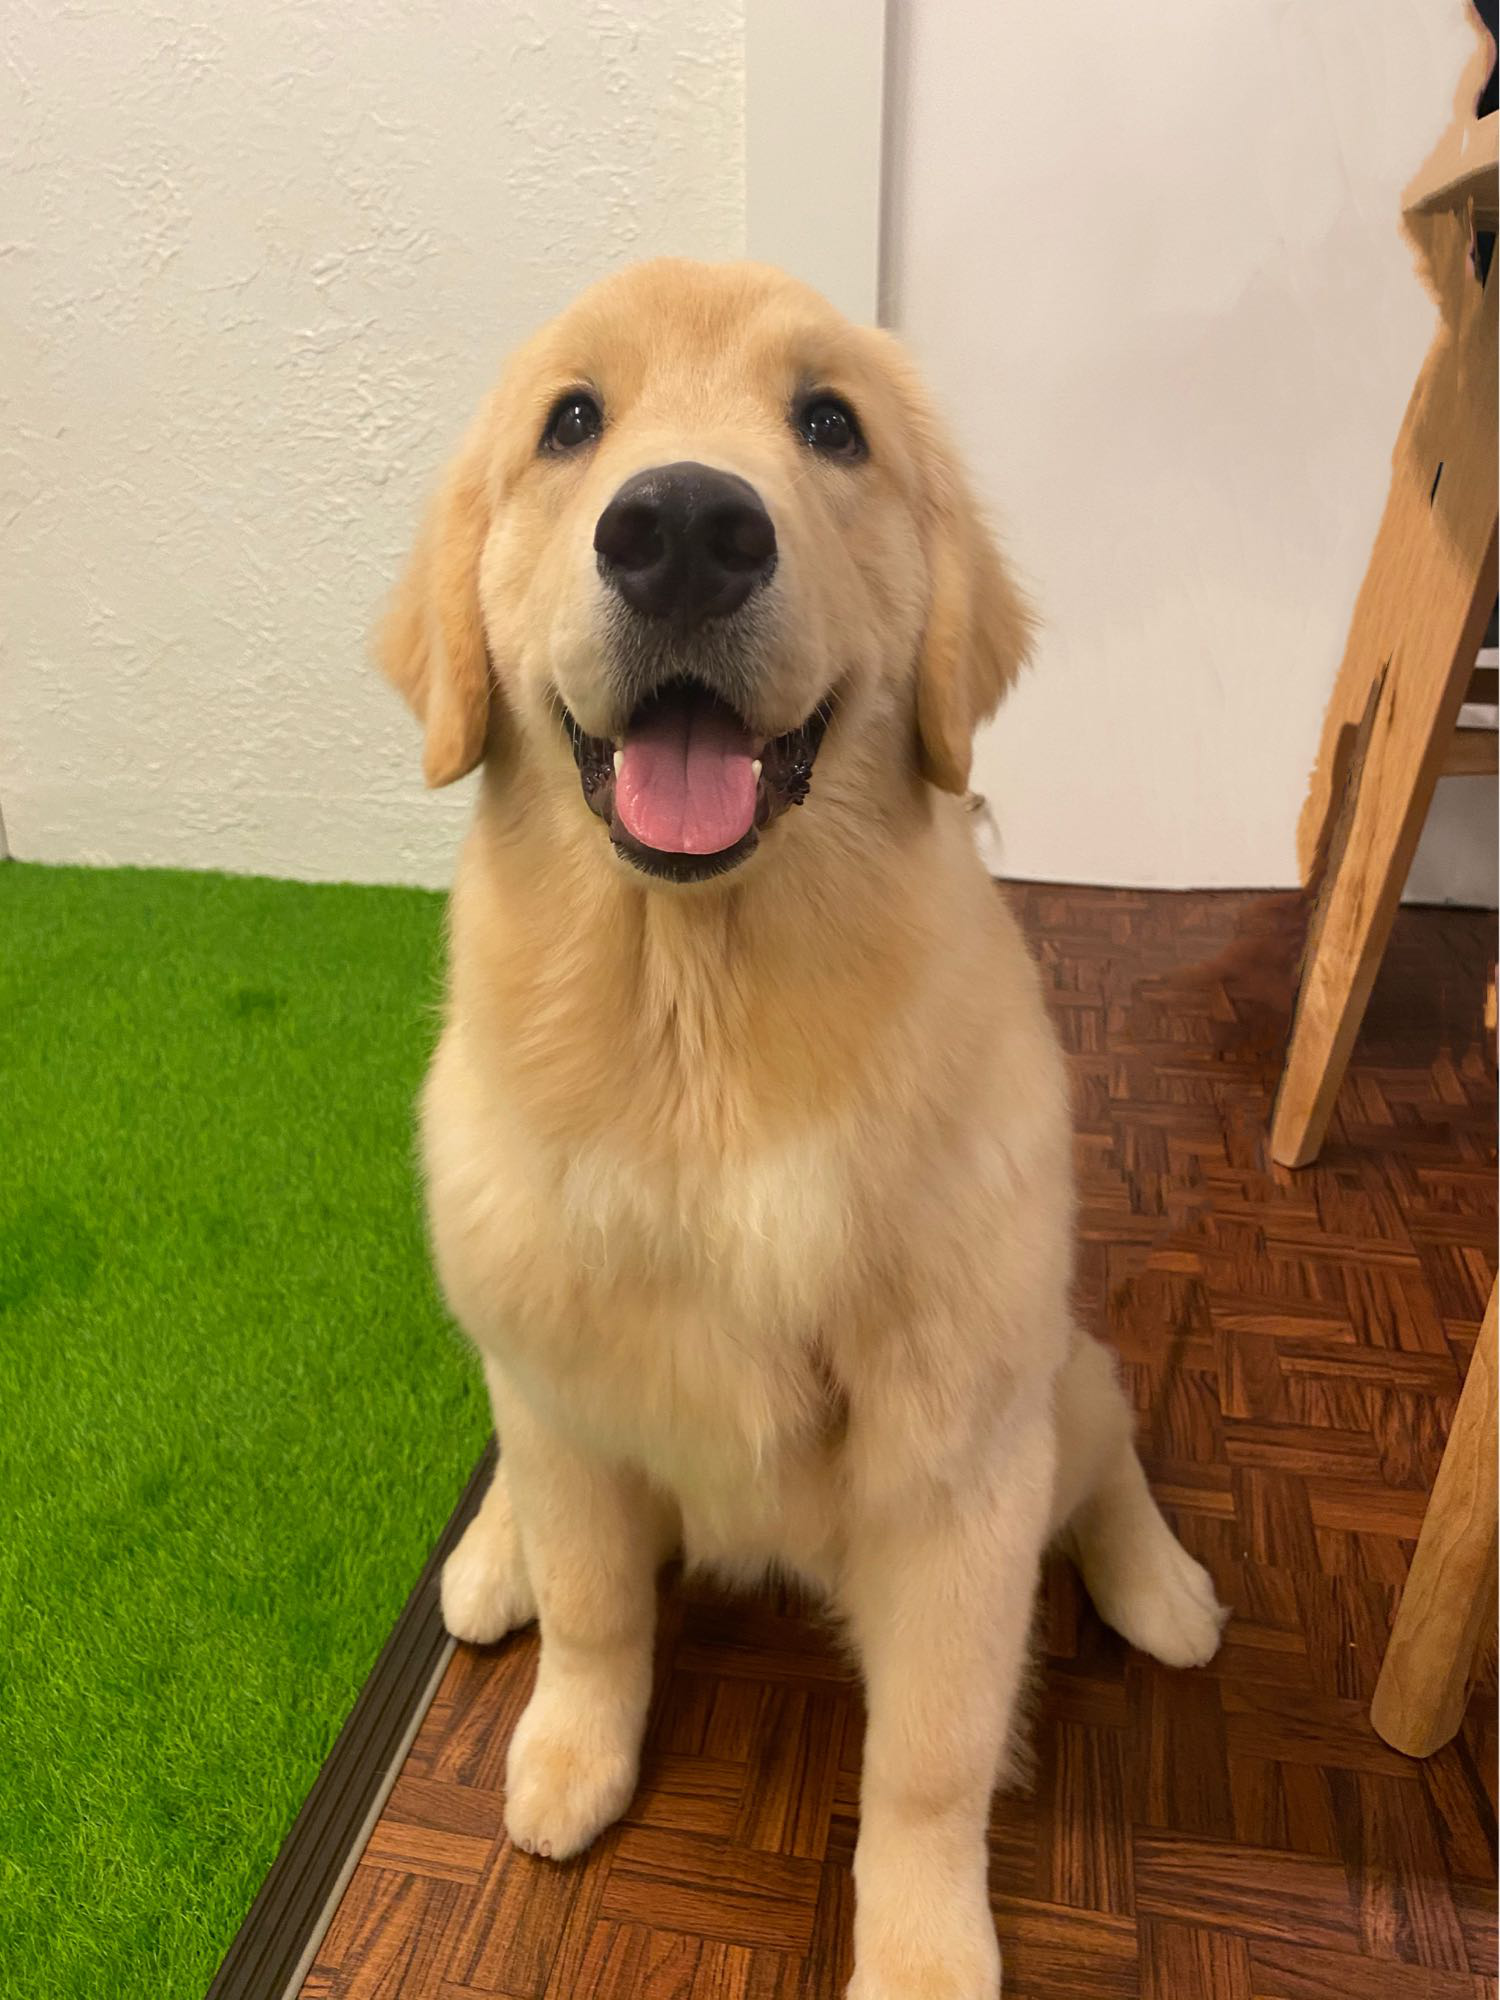

In [19]:
from PIL import Image   #Pillow
img = Image.open("dog.jpg")
img

In [20]:
img_t = preprocess(img)
img_t.shape     # image tensor

torch.Size([3, 224, 224])

In [21]:
import torch    # ResNet 規定必須是一個4D陣列 (多張圖)
batch_t = torch.unsqueeze(img_t, 0)   #0的位置增加一維   第0階增加1個階 (批次量)
batch_t.shape

torch.Size([1, 3, 224, 224])

In [23]:
resnet.eval()  #為了inference

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [24]:
out = resnet(batch_t)
out

tensor([[-1.8272e-02, -9.2456e-01, -2.8020e+00, -3.9528e+00, -4.3702e+00,
         -1.4408e+00, -3.8351e+00, -2.4192e+00, -7.2106e-01, -3.4747e+00,
          6.1251e-03, -6.0331e-01, -2.6375e+00, -2.7897e+00, -1.6016e+00,
         -3.3866e+00, -2.9364e+00, -1.6026e+00, -1.8212e+00, -1.7080e+00,
         -3.2159e+00, -2.2520e+00, -1.5786e+00,  8.7545e-01, -2.4591e+00,
          6.1481e-01, -1.2648e+00, -1.8438e+00, -4.7154e-01, -5.1547e-01,
         -2.3928e+00, -1.8553e+00, -1.1558e+00, -2.6719e+00, -1.2332e+00,
         -3.6045e+00, -1.5346e+00, -2.6508e+00, -6.6817e-01, -1.7550e-01,
         -1.0039e+00, -1.3738e+00,  1.2392e+00, -1.0296e+00, -1.1436e+00,
         -3.2989e-01,  8.3549e-01,  2.6726e-01, -2.2809e+00, -1.6503e+00,
         -1.3027e+00, -7.7332e-01, -1.2889e+00, -2.1227e+00, -2.7350e+00,
         -2.6478e+00, -2.5370e+00, -1.7509e+00, -3.3558e+00, -1.2652e+00,
         -1.0540e+00, -2.7913e+00, -6.8504e-01, -9.8398e-01, -1.4494e+00,
         -2.3287e+00, -1.3265e+00, -1.

In [25]:
out.shape  #1筆資料

torch.Size([1, 1000])

In [32]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]  # 去除首尾空格
labels

['0, tench',
 '1, goldfish',
 '2, great_white_shark',
 '3, tiger_shark',
 '4, hammerhead',
 '5, electric_ray',
 '6, stingray',
 '7, cock',
 '8, hen',
 '9, ostrich',
 '10, brambling',
 '11, goldfinch',
 '12, house_finch',
 '13, junco',
 '14, indigo_bunting',
 '15, robin',
 '16, bulbul',
 '17, jay',
 '18, magpie',
 '19, chickadee',
 '20, water_ouzel',
 '21, kite',
 '22, bald_eagle',
 '23, vulture',
 '24, great_grey_owl',
 '25, European_fire_salamander',
 '26, common_newt',
 '27, eft',
 '28, spotted_salamander',
 '29, axolotl',
 '30, bullfrog',
 '31, tree_frog',
 '32, tailed_frog',
 '33, loggerhead',
 '34, leatherback_turtle',
 '35, mud_turtle',
 '36, terrapin',
 '37, box_turtle',
 '38, banded_gecko',
 '39, common_iguana',
 '40, American_chameleon',
 '41, whiptail',
 '42, agama',
 '43, frilled_lizard',
 '44, alligator_lizard',
 '45, Gila_monster',
 '46, green_lizard',
 '47, African_chameleon',
 '48, Komodo_dragon',
 '49, African_crocodile',
 '50, American_alligator',
 '51, triceratops',
 

In [33]:
_, index = torch.max(out, 1) #第一軸最大值的索引
index[0]   #index為 1D陣列

tensor(207)

In [34]:
index

tensor([207])

In [35]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100   
percentage

tensor([4.4891e-06, 1.8137e-06, 2.7746e-07, 8.7784e-08, 5.7828e-08, 1.0824e-06,
        9.8753e-08, 4.0686e-07, 2.2230e-06, 1.4160e-07, 4.6000e-06, 2.5008e-06,
        3.2707e-07, 2.8091e-07, 9.2154e-07, 1.5464e-07, 2.4258e-07, 9.2070e-07,
        7.3991e-07, 8.2857e-07, 1.8343e-07, 4.8093e-07, 9.4299e-07, 1.0972e-05,
        3.9096e-07, 8.4549e-06, 1.2907e-06, 7.2333e-07, 2.8531e-06, 2.7305e-06,
        4.1777e-07, 7.1508e-07, 1.4393e-06, 3.1603e-07, 1.3321e-06, 1.2436e-07,
        9.8545e-07, 3.2275e-07, 2.3438e-06, 3.8360e-06, 1.6755e-06, 1.1574e-06,
        1.5785e-05, 1.6329e-06, 1.4569e-06, 3.2872e-06, 1.0543e-05, 5.9727e-06,
        4.6723e-07, 8.7777e-07, 1.2426e-06, 2.1098e-06, 1.2600e-06, 5.4732e-07,
        2.9670e-07, 3.2371e-07, 3.6166e-07, 7.9376e-07, 1.5947e-07, 1.2901e-06,
        1.5934e-06, 2.8046e-07, 2.3046e-06, 1.7091e-06, 1.0731e-06, 4.4542e-07,
        1.2135e-06, 8.5269e-07, 9.9456e-07, 7.4487e-07, 1.1454e-06, 2.0726e-06,
        1.6169e-06, 1.4576e-06, 1.0527e-

In [37]:
labels[index[0]], percentage[index[0]].item()

('207, golden_retriever', 98.10832977294922)

In [39]:
_, indices = torch.sort(out, descending=True)   #True高到低
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]] #前5高

[('207, golden_retriever', 98.10832977294922),
 ('208, Labrador_retriever', 1.3532649278640747),
 ('222, kuvasz', 0.3577938377857208),
 ('231, collie', 0.03000643290579319),
 ('205, flat-coated_retriever', 0.022227507084608078)]